In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

(-0.5, 63.5, 63.5, -0.5)

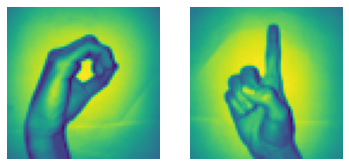

In [4]:
x_1 = np.load('X.npy')
Y_1 = np.load('Y.npy')
img_size=64
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size,img_size))
plt.axis('off')

In [5]:
#join sequence of arras along an row axis.
X = np.concatenate((x_1[204:409],x_1[822:1027]),axis=0)
z= np.zeros(205)
o = np.ones(205)
Y= np.concatenate((z,o),axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print('Y shape:', Y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


In [6]:
# then will create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Now we have 3 dimensional input array (X) so we need to make it flatten (2D) in order to use as input for our first deep learning model.
Our label array (Y) is already flatten(2D) so we leave it like that.
Lets flatten X array(images array




In [7]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test. reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten", X_train_flatten.shape)
print("X test flatten", X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [8]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


#Logistic Regression
Logistic regression is actually a very simple neural network

In [9]:
def dummy(parameter):
  dummy_paramter = parameter + 5
  return dummy_paramter
result = dummy(3)

In [10]:
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

w,b = initialize_weights_and_bias(4096)

## Forward Propagation

In [11]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [12]:
# calculation of z
# z= np.dot(w.t,x_train)+b
def sigmoid(z) :
  y_head = 1/(1+np.exp(-z))
  return y_head

In [13]:
y_head = sigmoid(0)
y_head

0.5

In [14]:
# forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss (error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
  z = np.dot(w.T,x_train) + b
  y_head = sigmoid(z) # probabilistic 0-1
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
  cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
  return cost

# Optimization Algorithm with Gradient Descent

In [15]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients


In [26]:
# Updating Learning parameters
def update(w,b,x_train,y_train, learning_rate, number_of_iteration):
  cost_list=[]
  cost_list2=[]
  index=[]
  #updating learning parameters is number_of_iteration times
  for  i in range(number_of_iteration):
    #making forward and backward propagation and find cost and gradients
    cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
    cost_list.append(cost)
    w = w - learning_rate * gradients["derivative_weight"]
    b = b - learning_rate * gradients["derivative_bias"]
    if i%10 == 0 :
      cost_list2.append(cost)
      index.append(i)
      print("cost after iteration %i: %f" %(i,cost))
  #updating learning parameters (weights and bais)
  parameters = {"weight": w,"bias": b}
  plt.plot(index, cost_list2)
  plt.xticks(index,rotation='vertical')
  plt.xlabel("Number of Iteration")
  plt.ylabel("Cost")
  plt.show()
  return parameters, gradients, cost_list

In [20]:
# we will build a function for prediction
def predict(w,b,x_test):
  #x_test is the input for forward propagation
  z = sigmoid(np.dot(w.T,x_test)+b)
  y_prediction= np.zeros((1,x_test.shape[1]))
  # if z is bigger than 0.5, our prediction is sign one(y_head=1),
  #if z smaller than 0.5, our prediction is sign zero(y_head=0)
  for i in range(z.shape[1]):
    if z[0,i]<= 0.5:
      y_prediction[0,i]= 0
    else:
      y_prediction[0,i]= 1
  return y_prediction

In [19]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

# The logistic regression model

In [31]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

cost after iteration 0: 14.014222
cost after iteration 10: 2.544689
cost after iteration 20: 2.577950
cost after iteration 30: 2.397999
cost after iteration 40: 2.185019
cost after iteration 50: 1.968348
cost after iteration 60: 1.754195
cost after iteration 70: 1.535079
cost after iteration 80: 1.297567
cost after iteration 90: 1.031919
cost after iteration 100: 0.737019
cost after iteration 110: 0.441355
cost after iteration 120: 0.252278
cost after iteration 130: 0.205168
cost after iteration 140: 0.196168


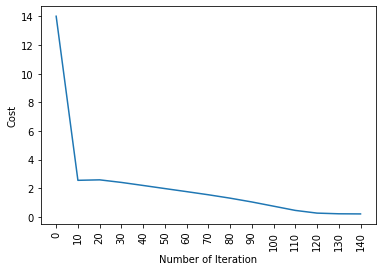

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [32]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

# Logistic regression with SKlearning

In [33]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


#Artificial Neural Network (ANN)
* It is also called deep neural network or deep learning.
* "Deep" means how many hidden layers it has.
* Hidden: Because hidden layer does not see inputs(training set).

In [34]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [35]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


# Loss function and Cost function

In [42]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

# Back propagation

In [49]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

# Update the parameters

In [38]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

# Prediction with learnt parameters weight and bias

In [39]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    print(Y_prediction)
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Building the Model

In [40]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

Cost after iteration 0: 0.399535
Cost after iteration 100: 0.364177
Cost after iteration 200: 0.351763
Cost after iteration 300: 0.347292
Cost after iteration 400: 0.345667
Cost after iteration 500: 0.345074
Cost after iteration 600: 0.344859
Cost after iteration 700: 0.344782
Cost after iteration 800: 0.344754
Cost after iteration 900: 0.344746
Cost after iteration 1000: 0.344743
Cost after iteration 1100: 0.344743
Cost after iteration 1200: 0.344744
Cost after iteration 1300: 0.344745
Cost after iteration 1400: 0.344746
Cost after iteration 1500: 0.344747
Cost after iteration 1600: 0.344748
Cost after iteration 1700: 0.344749
Cost after iteration 1800: 0.344750
Cost after iteration 1900: 0.344751
Cost after iteration 2000: 0.344752
Cost after iteration 2100: 0.344753
Cost after iteration 2200: 0.344753
Cost after iteration 2300: 0.344754
Cost after iteration 2400: 0.344754


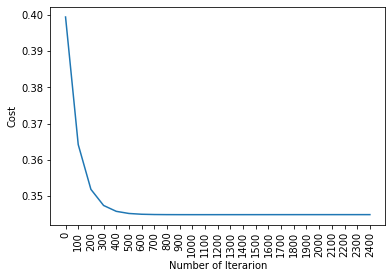

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [50]:
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)